<a href="https://colab.research.google.com/github/MANYI-anewbird/775/blob/main/%E2%80%9Cassignment1_830_%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Experimentation and Causal Methods
## Assignment 1
Manyi Hong

This assignment contains two parts. In the first part, your task is to analyze a dataset from a real-world experiment testing different headlines on social media. In the second part, your task will be to answer several questions about an application of the potential outcomes framework.

**Before you begin, please make sure to take a look at the notes on Python. Remember to use Slack to ask any questions you may have.**

## Part 1: Analyzing a real-world experiment

The data for this exercise comes from an experiment conducted by the Upworthy, a company famous for pioneering the use of experiments to find `clickbait' headlines that generate the most user engagement. The dataset contains rows corresponding to impressions (which occur when a user sees the link headline on social media). It also contains data on whether the impression leads to a click.

**Variable definitions**

headline: The headline shown to the user (string)

slug: The url corresponding to the headline (string)

clicked: Whether the user clicked on the headline, 1 or 0 (boolean)

eyecatcher_id: The id of the image shown with the headline (integer)

### Question 1:

Please change your name in the header from "Your Name Here" to your name. This helps when reading a submission.

### Question 2:

Please run the cell below to load the data. Verify that all of the columns are there by return the first 5 rows of `data_upworthy`.

In [31]:
from google.colab import data_table
from google.colab import drive
# Enable the interactive table feature
data_table.enable_dataframe_formatter()
# Access Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
import numpy as np

# Copy the dataset located at 'data/data_upworthy_exp.csv' into your own Google Drive.
# Paste the folder where you've put the data into this read_csv function.
data_upworthy = pd.read_csv('drive/My Drive/data_upworthy_exp.csv')

# Create a new column called 'slug_legally' that takes the value of 1 if the slug contains the word legally, and 0 otherwise.
data_upworthy['slug_legally'] = data_upworthy['slug'].str.contains('legally').astype(int)

# Generate a random variable. It is meaningless, but it will allow us to see how the data is structured.
# This variable takes random values from a normal distribution with mean 0 and standard deviation 5. It is then rounded.
# The length of the variable is the same as the length of the data.
data_upworthy['random_variable'] =  np.round(np.random.normal(0, 5, len(data_upworthy)))

# Look at the data:
data_upworthy.head(5)

,headline,slug,eyecatcher_id,clicked,slug_legally,random_variable
0,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,-1.0
1,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,6.0
2,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,4.0
3,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,6.0
4,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,-4.0


### Question 3:
Find the headline corresponding to row 4203 and create a variable called `this_headline` with the headline. Return the object `this_headline’. By ‘return’ I mean just type ‘this_headline’ into the cell and when it runs it will show you the contents of ‘this_headline’.


In [33]:
# Remember, you can reference rows and columns in a Python dataframe using the .loc method. For example, data.loc[5, 'column_name'] would return the value of 'column_name' for the 5th row of the dataframe.

# Your code here.
this_headline = data_upworthy.loc[4203,'headline']
this_headline


'$3 Million Is What It Takes For A State To Legally Kill Someone'

### Question 4:
Select a subset of the data for which column `clicked` equals 1. This represents the observations where the user clicked on the headline.

In [34]:
# Your code here
data_clicked_1 = data_upworthy[data_upworthy['clicked']=='1']
data_clicked_1.head()

,headline,slug,eyecatcher_id,clicked,slug_legally,random_variable
0,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,-1.0
1,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,6.0
2,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,4.0
3,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,6.0
4,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,-4.0


### Question 5:
Are there any missing or inappropriate values in the data? If so use Python to identify these.

In [35]:
data_upworthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18217 entries, 0 to 18216
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   headline         18217 non-null  object 
 1   slug             18217 non-null  object 
 2   eyecatcher_id    18217 non-null  object 
 3   clicked          18215 non-null  object 
 4   slug_legally     18217 non-null  int64  
 5   random_variable  18217 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 854.1+ KB


In [36]:
data_upworthy.isnull().sum()


,0
headline,0
slug,0
eyecatcher_id,0
clicked,2
slug_legally,0
random_variable,0


### Question 6:
Use python to calculate the number of unique headlines. You can use the `nunique()` method to do this.

In [37]:
# Here's an example:
data_upworthy['slug'].nunique()
# Your code here
data_upworthy['headline'].nunique()

6

### Question 7:
Calculate the share of impressions that see each headline. You can use the `value_counts()` method to do this.

In [38]:
# To get you started, below is some example code that uses the value counts method. You can use this as a starting point for your own code.
# This calculates the number of times each value of the random variable occurs in the data.
value_random_variables = data_upworthy['random_variable'].value_counts()
value_random_variables

# This shows the total number of rows in the data.
len(data_upworthy)

# Your code here
value_random_headline = data_upworthy['headline'].value_counts()
value_random_headline

,count
headline,
"Let’s See … Hire Cops, Pay Teachers, Buy Books For Schools. Or Kill People. Hard Choice, Right?",3118
"I Was Already Against The Death Penalty, But Now That I See What It Costs Us All? Ahem.",3061
Reason #351 To End The Death Penalty: It Costs $3 Million Per Case.,3050
$3 Million Is What It Takes For A State To Legally Kill Someone,3017
I'll Say It: It's Not OK For States To Legally Murder People.,2997
The Fact That Sometimes Innocent People Are Executed Is Enough To End The Death Penalty. But This?,2974


### Question 8:
Calculate the click rate by headline. Which one has the highest?

In [39]:
data_upworthy.head()

,headline,slug,eyecatcher_id,clicked,slug_legally,random_variable
0,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,-1.0
1,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,6.0
2,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,4.0
3,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,6.0
4,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,1,0,-4.0


In [40]:
data_upworthy['clicked'] = pd.to_numeric(data_upworthy['clicked'],errors='coerce')

In [41]:
# Sample code. This code calculate the mean of clicked by each value of 'slug_legally'
data_click_slug = data_upworthy.groupby('slug_legally').agg(click_rate=('clicked', 'mean'), num_impressions=('clicked', 'size')).reset_index()
data_click_slug
# Your code here:
data_click_headline = data_upworthy.groupby('headline').agg(click_rate=('clicked', 'mean'), num_impressions=('clicked', 'size')).reset_index().sort_values(by='click_rate',ascending=False)
data_click_headline

,headline,click_rate,num_impressions
5,The Fact That Sometimes Innocent People Are Ex...,0.008742,2974
2,I'll Say It: It's Not OK For States To Legally...,0.006673,2997
1,"I Was Already Against The Death Penalty, But N...",0.006534,3061
0,$3 Million Is What It Takes For A State To Leg...,0.006298,3017
4,Reason #351 To End The Death Penalty: It Costs...,0.003279,3050
3,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",0.002568,3118


The highest is *The Fact That Sometimes Innocent People Are Executed Is Enough To End The Death Penalty. But This?*

### Question 9:
Plot the click rate by headline using the either the `seaborn` library.

The `seaborn` documentation is available [here](https://seaborn.pydata.org/).


### Bonus:
Make the plot look really good. The few best plots in each class will get extra points.

In [44]:
data_click_headline

,headline,click_rate,num_impressions
5,The Fact That Sometimes Innocent People Are Ex...,0.008742,2974
2,I'll Say It: It's Not OK For States To Legally...,0.006673,2997
1,"I Was Already Against The Death Penalty, But N...",0.006534,3061
0,$3 Million Is What It Takes For A State To Leg...,0.006298,3017
4,Reason #351 To End The Death Penalty: It Costs...,0.003279,3050
3,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",0.002568,3118


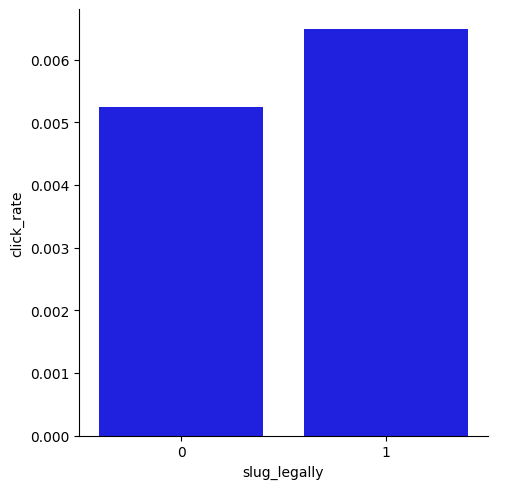

In [45]:
import matplotlib.ticker as ticker
import seaborn as sn

# Seaborn
g = sn.catplot(data = data_click_slug, kind="bar", x="slug_legally", hue = None, y = "click_rate", color = 'blue')
g

<ipython-input-63-c0e77807bfce>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data_click_headline['headline'], ha='right')
<ipython-input-63-c0e77807bfce>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


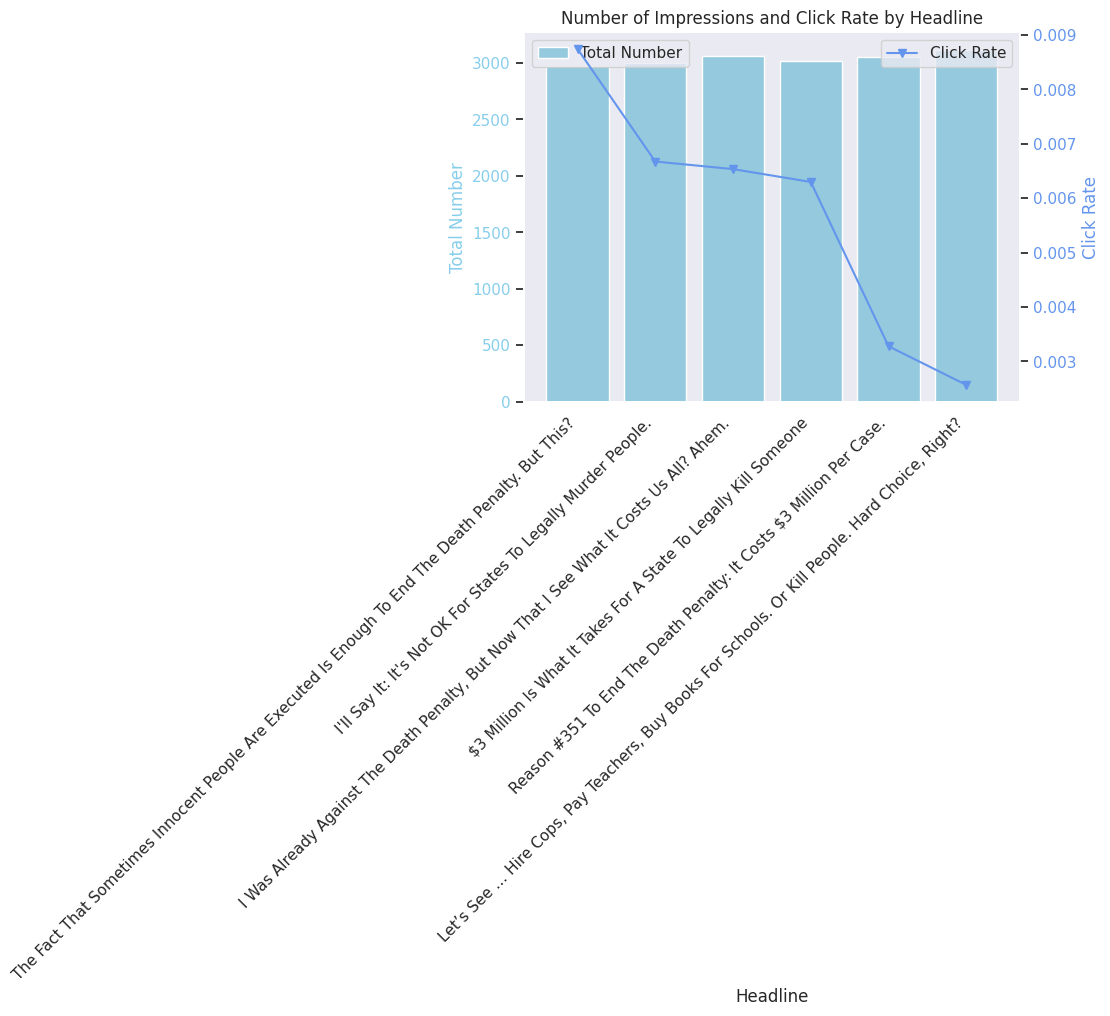

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()


sns.barplot(
    x='headline', y='num_impressions', data=data_click_headline,
    color='skyblue', ax=ax1, label='Total Number'
)
ax1.set_ylabel('Total Number',  color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xlabel('Headline')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(
    data_click_headline['headline'],
    data_click_headline['click_rate'],
    color='cornflowerblue', marker='v', label='Click Rate'
)
ax2.set_ylabel('Click Rate', color='cornflowerblue')
ax2.tick_params(axis='y', labelcolor='cornflowerblue')
ax2.legend(loc='upper right')


ax1.set_xticklabels(data_click_headline['headline'], ha='right')
plt.title('Number of Impressions and Click Rate by Headline', loc='center')
plt.tight_layout()
plt.show()


**AI Statement:**
01 I used ChatGPT to know what kind of color can I use in seaborn
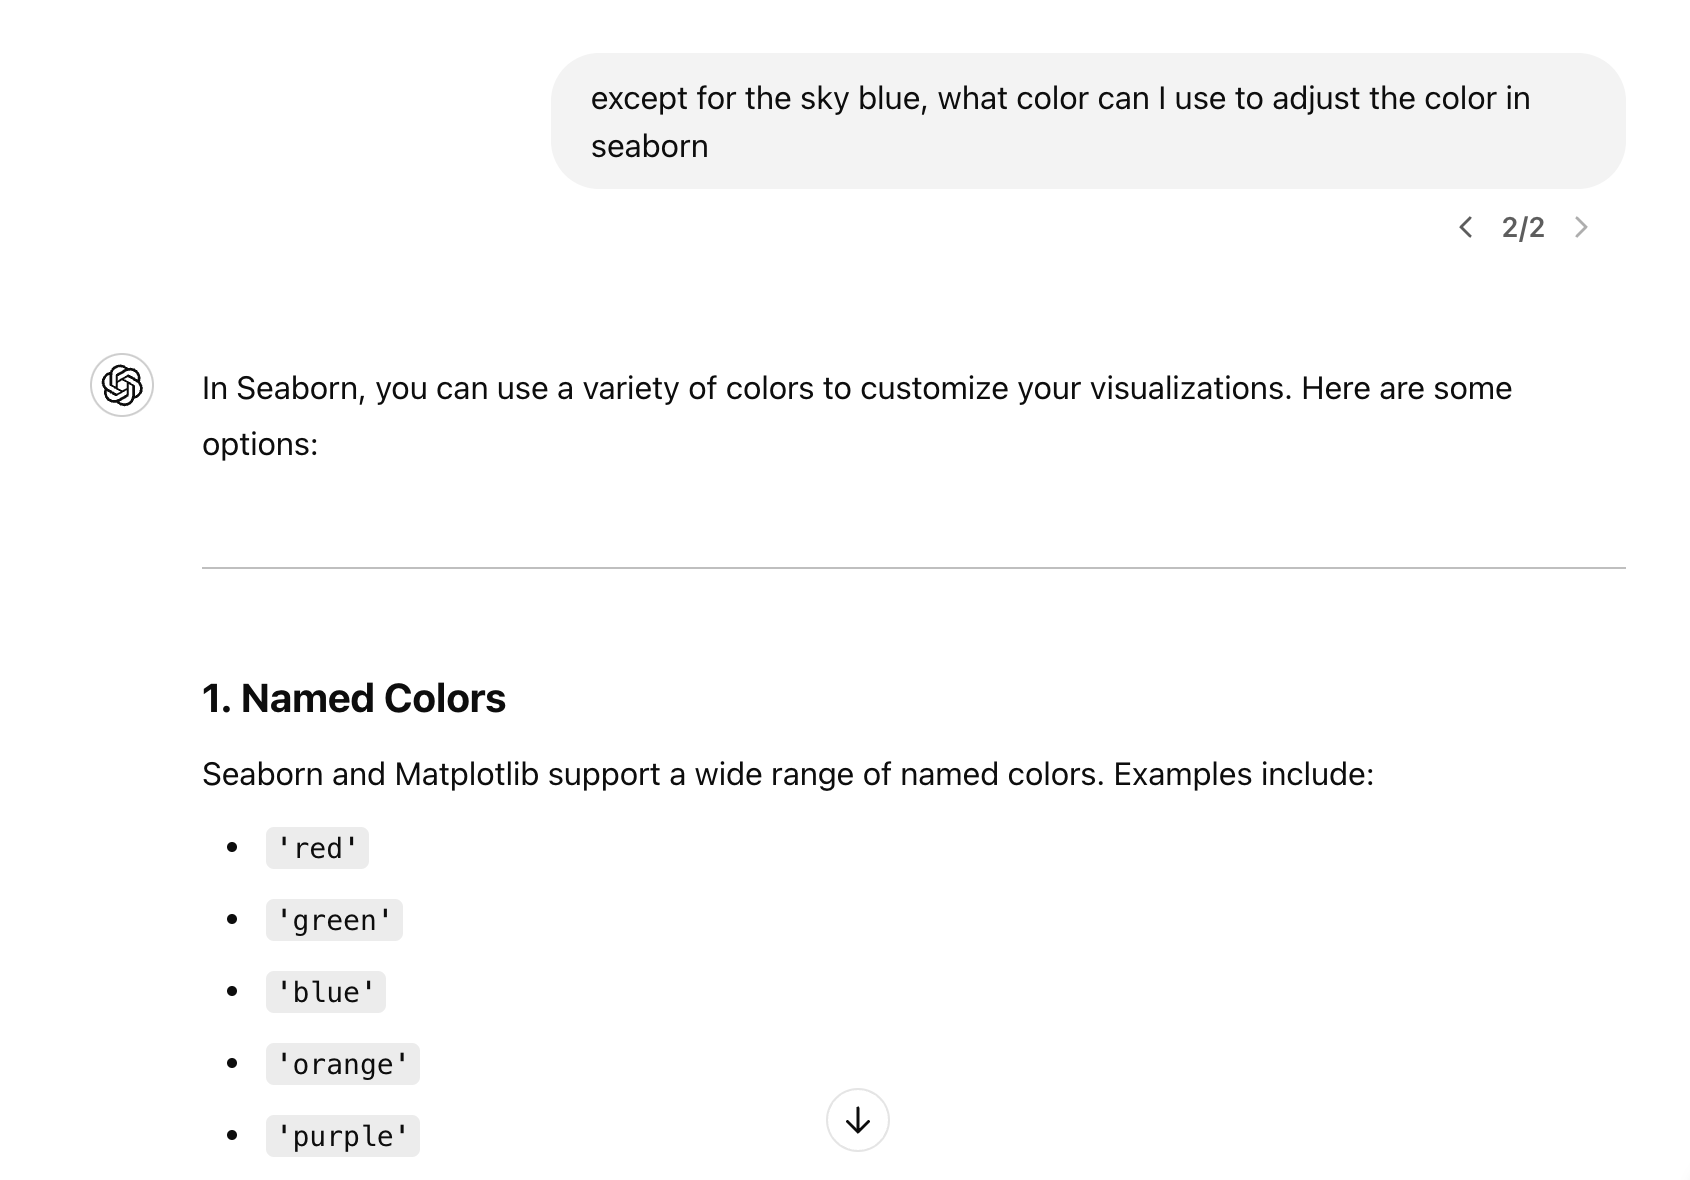
02 I used GPT to teach me how to beautify the chart
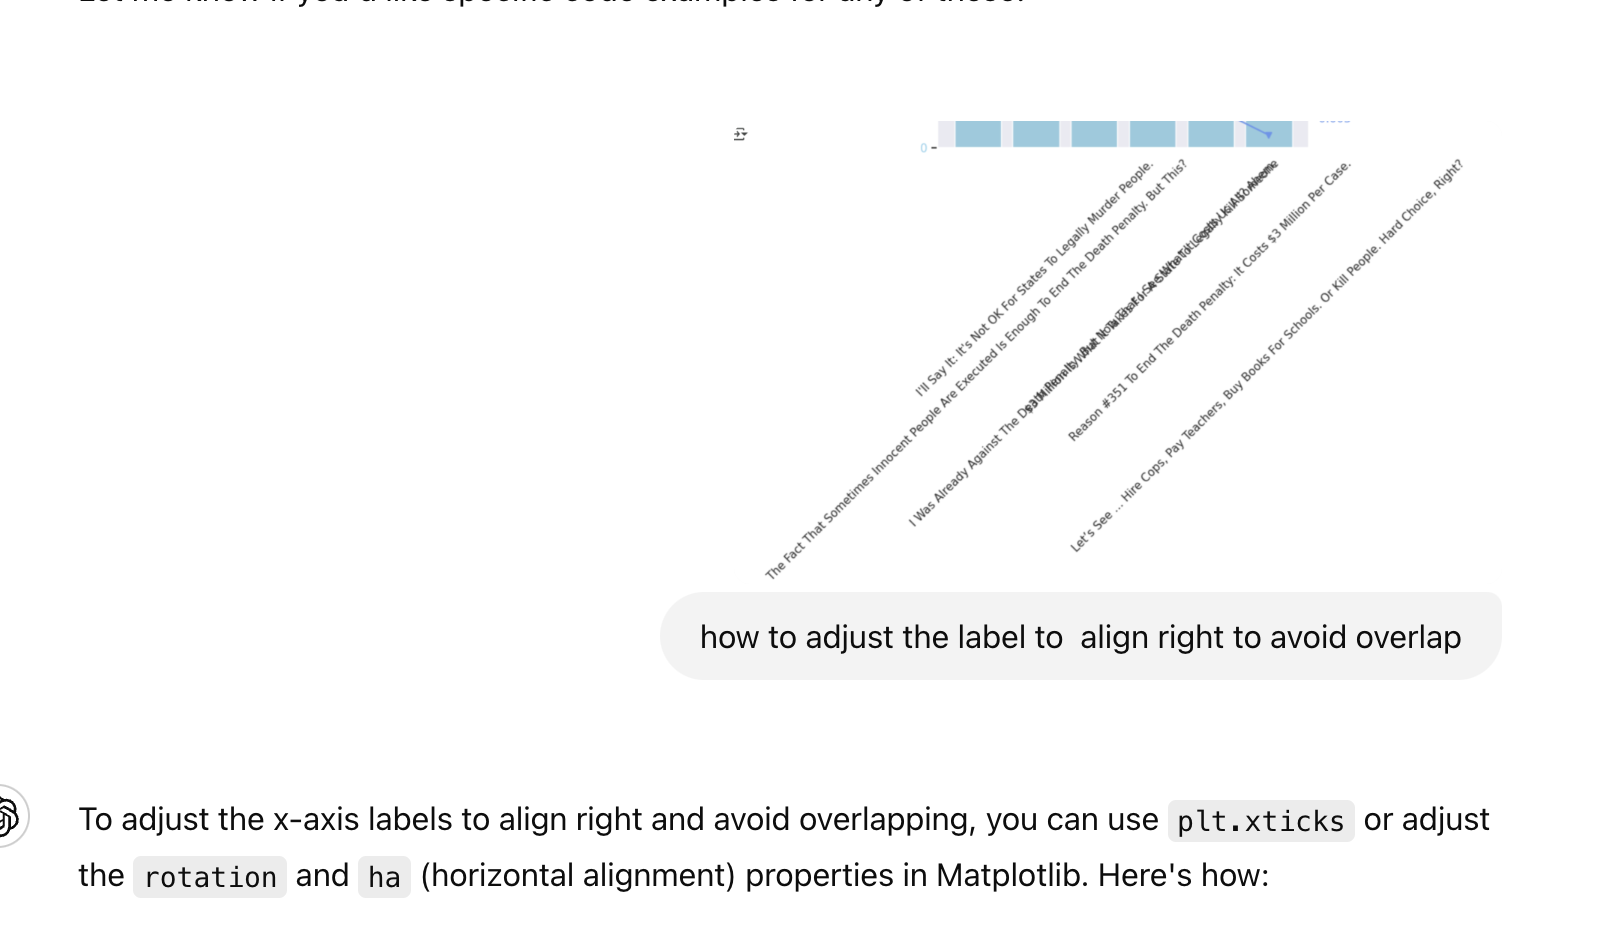

## Part 2: Potential Outcomes

Suppose Wayfair is interested in ways to increase the conversion rate of its users. Wayfair’s hypothesis is that by providing a question and answer section on each furniture page, they would be able to induce users to buy more furniture. The problem is inspired by this [paper](https://people.bu.edu/zg/publications/reviews-qa.pdf) but you don’t have to read it.


Consider the following population of ten users whose sales rates we can measure.

| Potential Outcomes (POs) | Revenue if user saw Q&A | Revenue if user did not see Q&A |
|-------------------------|-------------------------|---------------------------------|
| User 1                  | 1100                    | 1100                            |
| User 2                  | 100                     | 600                             |
| User 3                  | 500                     | 500                             |
| User 4                  | 100                     | 900                             |
| User 5                  | 1600                    | 700                             |
| User 6                  | 2000                    | 2000                            |
| User 7                  | 1200                    | 1200                            |
| User 8                  | 700                     | 700                             |
| User 9                  | 1100                    | 300                             |
| User 10                 | 140                     | 140                             |


#### 2.1: What do User 2’s two potential outcomes mean in plain language?

#### 2.2: Give the individual true treatment effect (that is, the true “impact” or “causal effect” of Q&A) for each of the ten users. We are thinking of the “Treatment” as seeing the Q&A.
_Notes_:
- This is only possible because we are working with hypothetical potential outcomes; we could never have this much information with real-world data.
- We encourage the use of computing tools on all problems, but please describe your work so that we can determine whether you are using the correct values (e.g.: include code if using Python). This will become more important in future problem sets._


#### 2.3: In a single paragraph, tell a story that could explain this distribution of treatment effects. What might cause some users to have different treatment effects than others?


#### 2.4: For this population of 10 users, what is the true average treatment effect (ATE) of seeing Q&A?


#### 2.5: Suppose that Wayfair implements an experiment in which users are randomly assigned to Treatment and Control groups. Assume that by chance (that is, suppose this is random) the odd-numbered users are assigned to Treatment (Q&A) and the even-numbered users to Control (no Q&A).  What is the estimate of the ATE you would reach under that particular assignment? (Again, please show your work.)  


#### 2.6: Please use the function ‘np.quantile’ in Python to calculate the 30th quantile of the treatment effects in the Q&A example.
_Note: This question is testing your ability to use the documentation in Python to correctly apply a function._


How long did this assignment take you to do (hours)? How hard was it (easy, reasonable, hard, too hard)?  


In [47]:
# This code creates the above table:
data = {
    'person': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'rev_if_qa': [1100, 100, 500, 100, 1600, 2000, 1200, 700, 1100, 140],
    'rev_if_noqa': [1100, 600, 500, 900, 700, 2000, 1200, 700, 300, 140]
}

df = pd.DataFrame(data)
print(df)

   person  rev_if_qa  rev_if_noqa
0       1       1100         1100
1       2        100          600
2       3        500          500
3       4        100          900
4       5       1600          700
5       6       2000         2000
6       7       1200         1200
7       8        700          700
8       9       1100          300
9      10        140          140


In [48]:
# Please use a combination of code blocks and text blocks to write your answers.

## **Part2 Answer:**

### **Question 2.1 : What do User 2’s two potential outcomes mean in plain language?**

**Answer:** User2 is likely to only spend 100 dollars when it sees the Q&A section which is lower than when the Q&A section is not present which can be 600, this means user2 prefers non-Q&A pages the Q&A section would dissatisfy user2's shopping experience.

### **Question 2.2: Give the individual true treatment effect (that is, the true “impact” or “causal effect” of Q&A) for each of the ten users. We are thinking of the “Treatment” as seeing the Q&A.**


In [65]:
df['true_treatment_effect']=df['rev_if_qa']-df['rev_if_noqa']
print(df)

   person  rev_if_qa  rev_if_noqa  true_treatment_effect
0       1       1100         1100                      0
1       2        100          600                   -500
2       3        500          500                      0
3       4        100          900                   -800
4       5       1600          700                    900
5       6       2000         2000                      0
6       7       1200         1200                      0
7       8        700          700                      0
8       9       1100          300                    800
9      10        140          140                      0


**Answer:** look at the column *true_treatment_efect*



### **Question 2.3 :  In a single paragraph, tell a story that could explain this distribution of treatment effects. What might cause some users to have different treatment effects than others?**

**Answer:**
It can be explained by their shopping behaviors and preferences
1.   For those who have no effect: They already have what they want to buy in Wayfair in their mind (from advertisements or recommendations from friends) so they purchase without thinking too much or comparing, and the presence of the Q&A section did not impact their decisions
2.   For those who have negative effects: a. They like a clean and straightforward interface who want to search quickly, and the Q&A section could have distracted or frustrated them. b. They didn't get good answers from the Q&A section after they submitted their question.
3.   For those who have positive effects: a. They are confused about the product they want and need additional information  at that moment. b. They get satisfied responses from the Q&A section.


### **Question 2.4: For this population of 10 users, what is the true average treatment effect (ATE) of seeing Q&A?**

In [66]:
ATE = df['true_treatment_effect'].mean()
print(ATE)

40.0


**Answer:** The true average treatment effect (ATE) of seeing Q&A is 40

### **Question 2.5: Suppose that Wayfair implements an experiment in which users are randomly assigned to Treatment and Control groups. Assume that by chance (that is, suppose this is random) the odd-numbered users are assigned to Treatment (Q&A) and the even-numbered users to Control (no Q&A). What is the estimate of the ATE you would reach under that particular assignment?**

In [77]:
df['person'].astype(int)
df['group'] = df['person'] % 2

ATE_random = (df['group'] * df['true_treatment_effect']).sum() / df['group'].sum()
print(ATE_random)

340.0


**Answer:** The ATE it reach under that particular assignment is 340

**AI Statement:** I used ChatGPT to help me identify the problem of my code
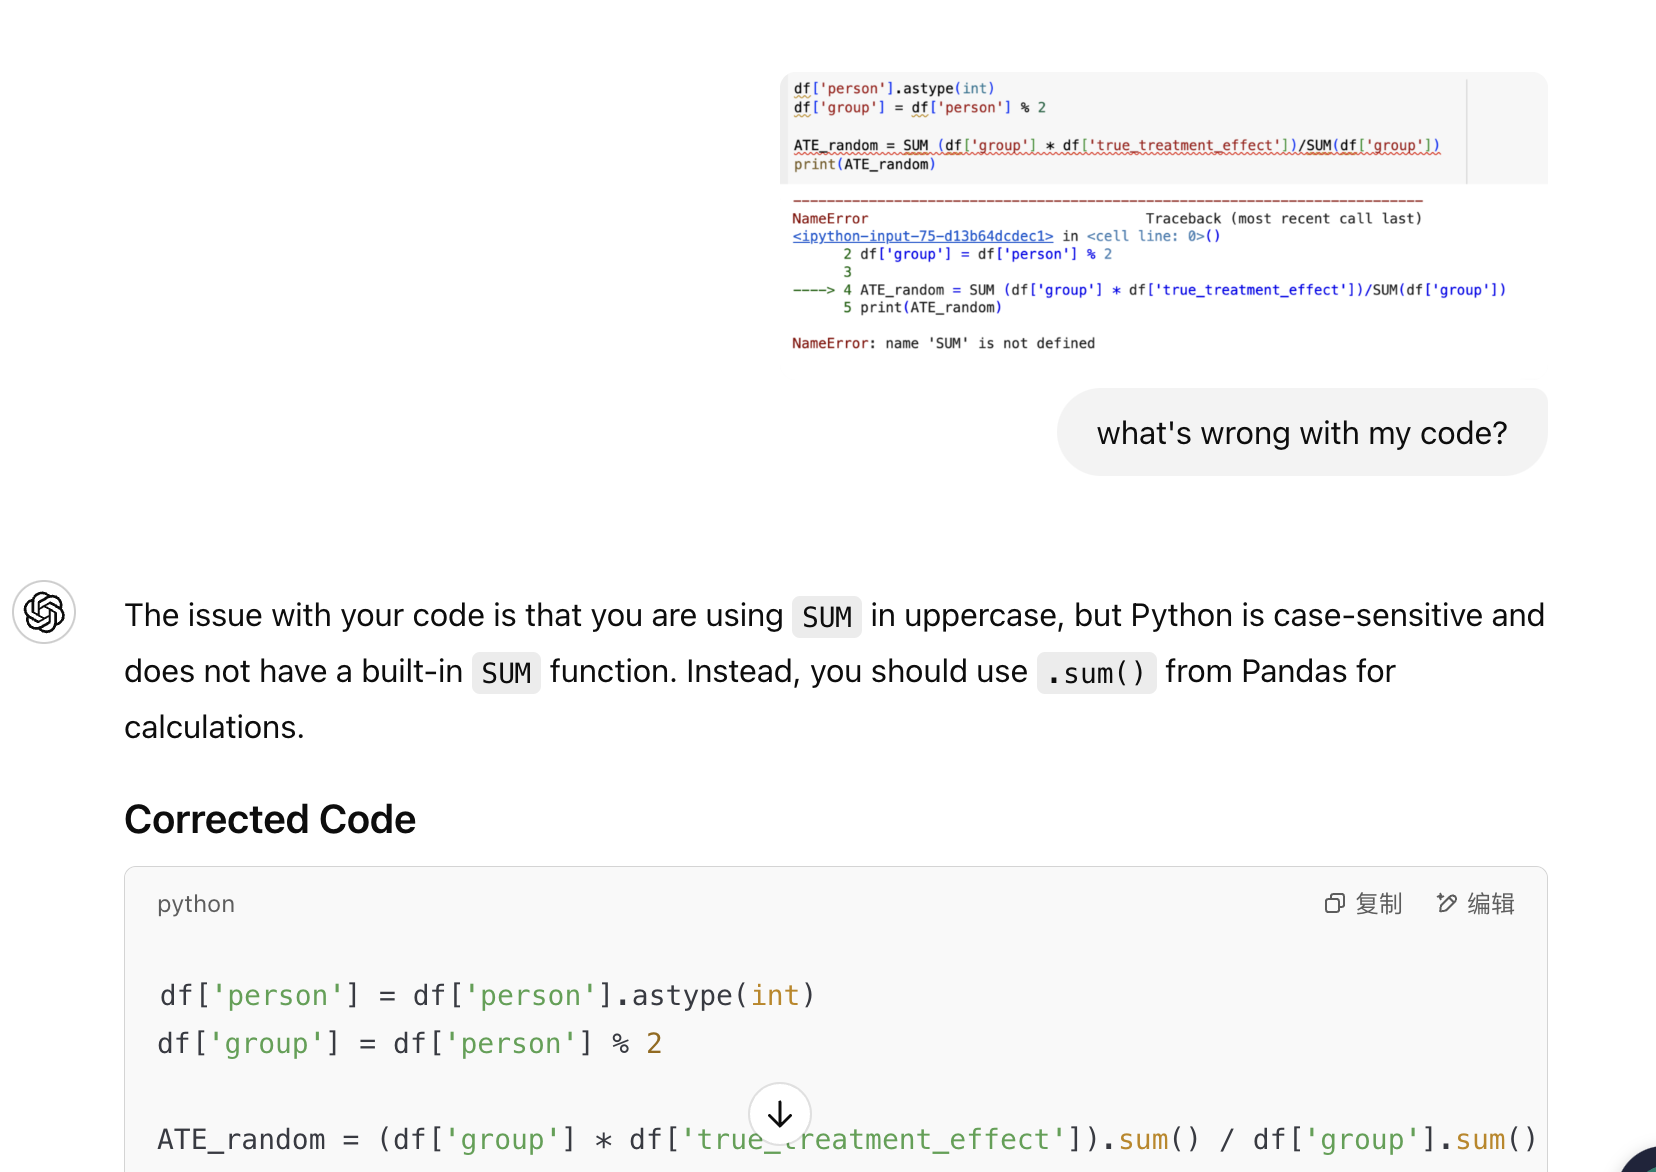

### **Question 2.6: Please use the function ‘np.quantile’ in Python to calculate the 30th quantile of the treatment effects in the Q&A example.**

In [79]:
quantile_30 = np.quantile(df[df['group']==1]['true_treatment_effect'],0.3)
print(quantile_30)

0.0


**Answer:** It's 0

**AI Statement:** I use ChatGPT to understand how np.quantile works
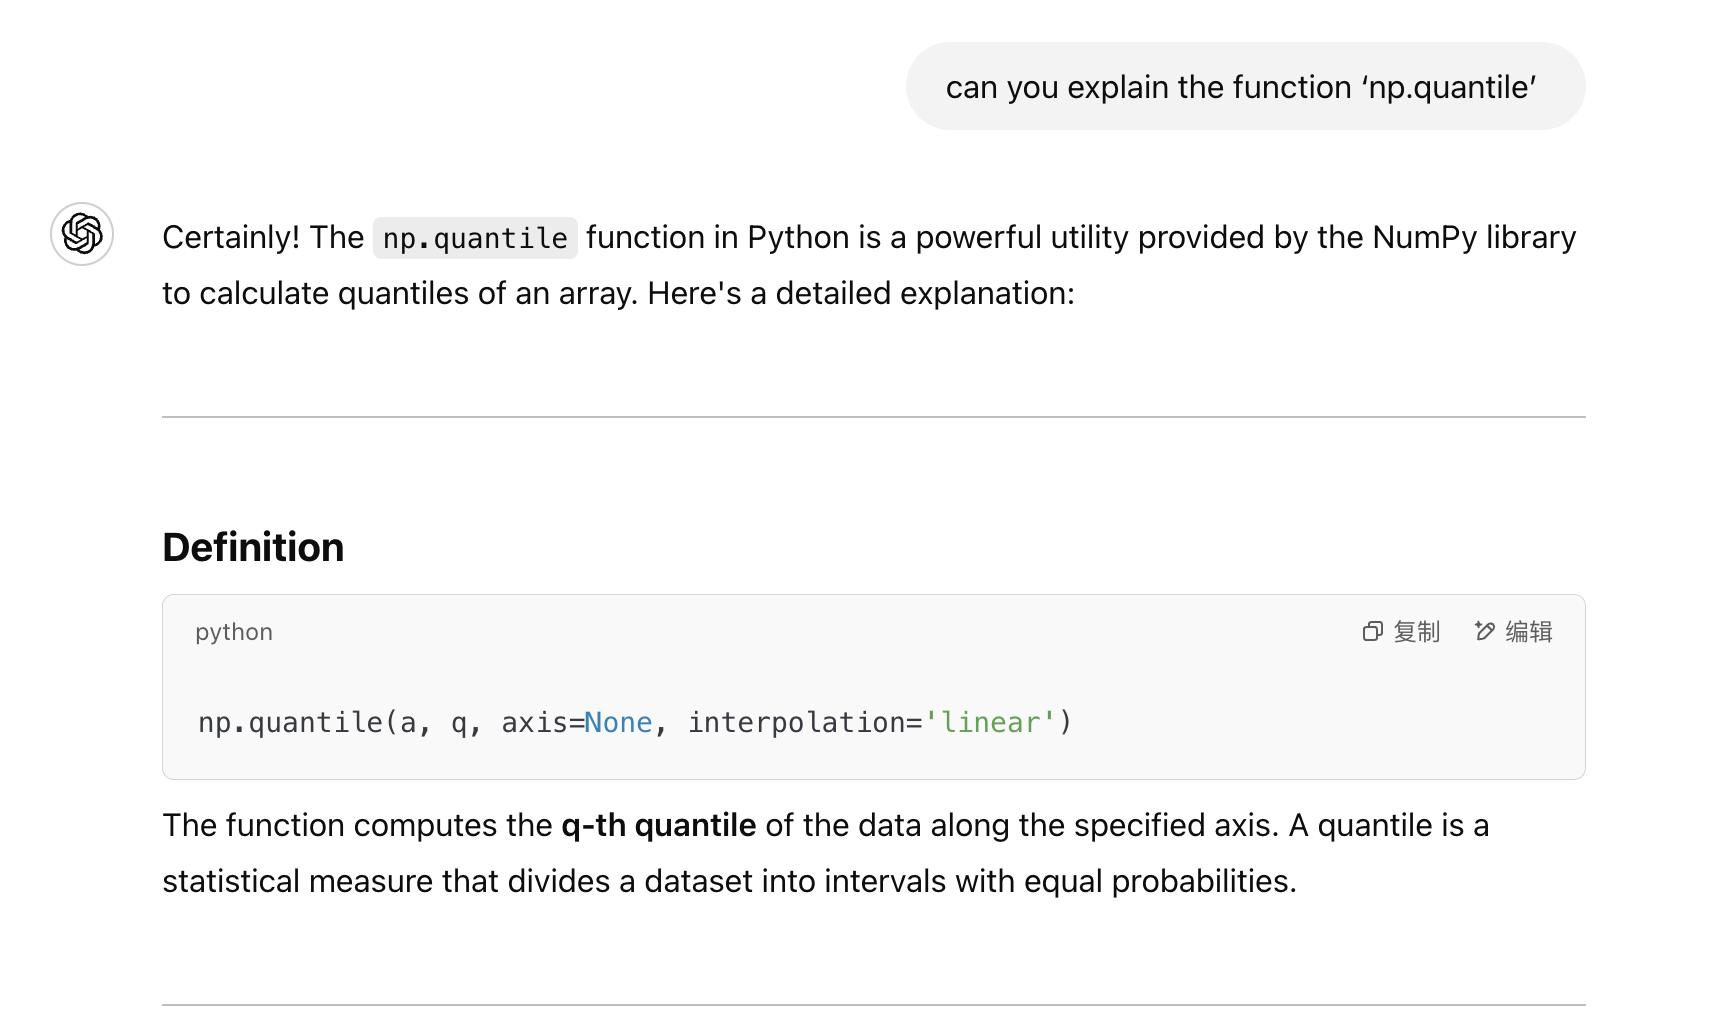

### **How long did this assignment take you to do (hours)? How hard was it (easy, reasonable, hard, too hard)?**

**Basic statement:** It took me about 2-3 hours to complete it. It's not difficult, but I had forgotten some basic coding knowledge as well as some basic busniess concept, so I spent some time reviewing the coding part and foundational concepts like treatment group and control group.

**GenAI disclosure**: I use artificial intelligence to help understand concepts and check code errors. At the same time, I also use it to help beautify charts in the seaborn session. In the part where artificial intelligence is used in the assignment, I pasted the record of my conversation with GPT under the corresponding answer.